# Exploratory Data Analysis

### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

### Loading Data and Descriptive Statistics

In [2]:
# load client data
client = pd.read_csv('./client_data.csv')
client.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [3]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [4]:
# converting datetime features to datetime data type
for f in ['date_activ','date_end','date_modif_prod','date_renewal']:
    client[f] = pd.to_datetime(client[f])

In [5]:
client['contract_start_year'] = client['date_activ'].dt.year
client['contract_end_year'] = client['date_end'].dt.year

In [6]:
client[client.dtypes[client.dtypes=='datetime64[ns]'].index.tolist()].describe(datetime_is_numeric=True)

,date_activ,date_end,date_modif_prod,date_renewal
count,14606,14606,14606,14606
mean,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488
min,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00
25%,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00
50%,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00
75%,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00
max,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00


In [7]:
client.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,contract_start_year,contract_end_year
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152,2010.577502,2016.064563
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175,1.653268,0.245761
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000,2003.000000,2016.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000,2010.000000,2016.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000,2011.000000,2016.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000,2012.000000,2016.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000,2014.000000,2017.000000


In [8]:
# load price data
price = pd.read_csv('./price_data.csv')
price.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [9]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [10]:
# convert datetime feature to datetime data type
price['price_date'] = pd.to_datetime(price['price_date'])

In [11]:
price.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


### Data Visualization

In [12]:
# function to plot bar chart to display feature distribution with % labels
def plot_feature(df, target_variable, if_sort=False, gap_label_bar=0, size=(7,4)):
    # data prep
    plot_data = client[[target_variable]].value_counts().reset_index(name='count')
    plot_data['percent'] = plot_data['count']/plot_data['count'].sum()
    if if_sort:
        x_order = plot_data.sort_values(by=['percent'], ascending=False)[target_variable]
    else:
        x_order = plot_data.sort_values(by=[target_variable], ascending=True)[target_variable]
    # plotting
    fig = plt.figure(figsize=size)
    ax = sns.barplot(data=plot_data, x=target_variable, y='percent', order=x_order)
    # labels
    for p in ax.patches:
        x = p.get_x() + p.get_width()/2
        y = p.get_height() + gap_label_bar
        ax.annotate(text='{:.2f}%'.format(p.get_height()*100), xy=(x, y), ha='center')
    ax.margins(y=0.1)



In [13]:
# function to plot bar chart with % labels by churn
def plot_churn(df, target_variable, if_sort=False, gap_label_bar=0, size=(7,4)):
    plot_data = df.groupby([target_variable,'churn']).size().reset_index(name='count')
    plot_data = plot_data.pivot(index=target_variable, columns='churn', values='count').fillna(0)
    plot_data = plot_data.div(plot_data.sum(axis=1), axis=0)
    if if_sort:
        plot_data = plot_data.sort_values(by=[0])
    ax = plot_data.plot(kind='bar', rot=False, stacked=True, figsize=size)
    plt.legend(['stay', 'switch'], loc='upper center', ncol=2)
    # labels
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height()*100)
        if percentage!='0.0%':
            x = p.get_x() + p.get_width()/2
            y = 1 - p.get_height()/1.8
            ax.annotate(text=percentage, xy=(x, y), ha='center')
    ax.margins(y=0.1)


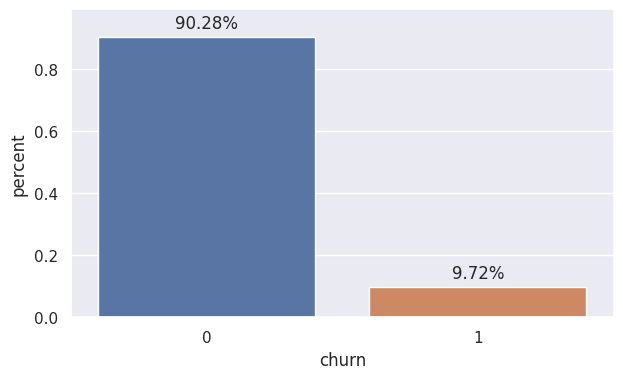

In [14]:
plot_feature(df=client, target_variable="churn", gap_label_bar=0.03)

This shows that the customer churn rate is 9.72%.

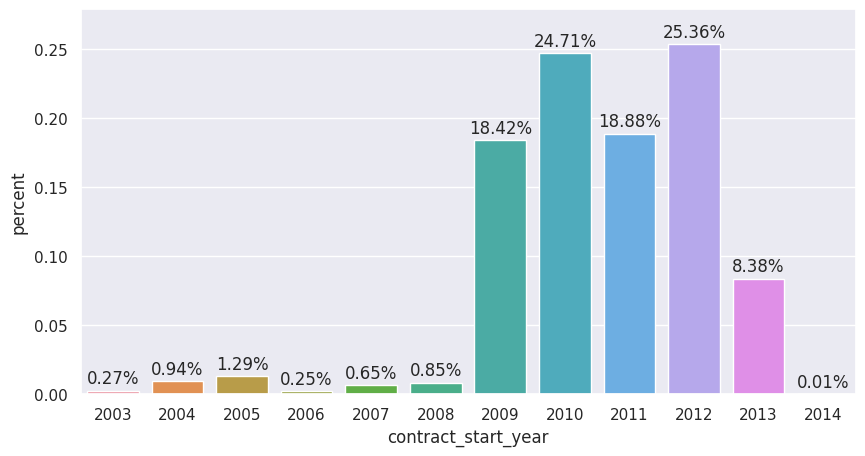

In [15]:
plot_feature(df=client, target_variable='contract_start_year', if_sort=False, gap_label_bar=0.005, size=(10,5))

The majority of customers started their contracts from 2009-2013.

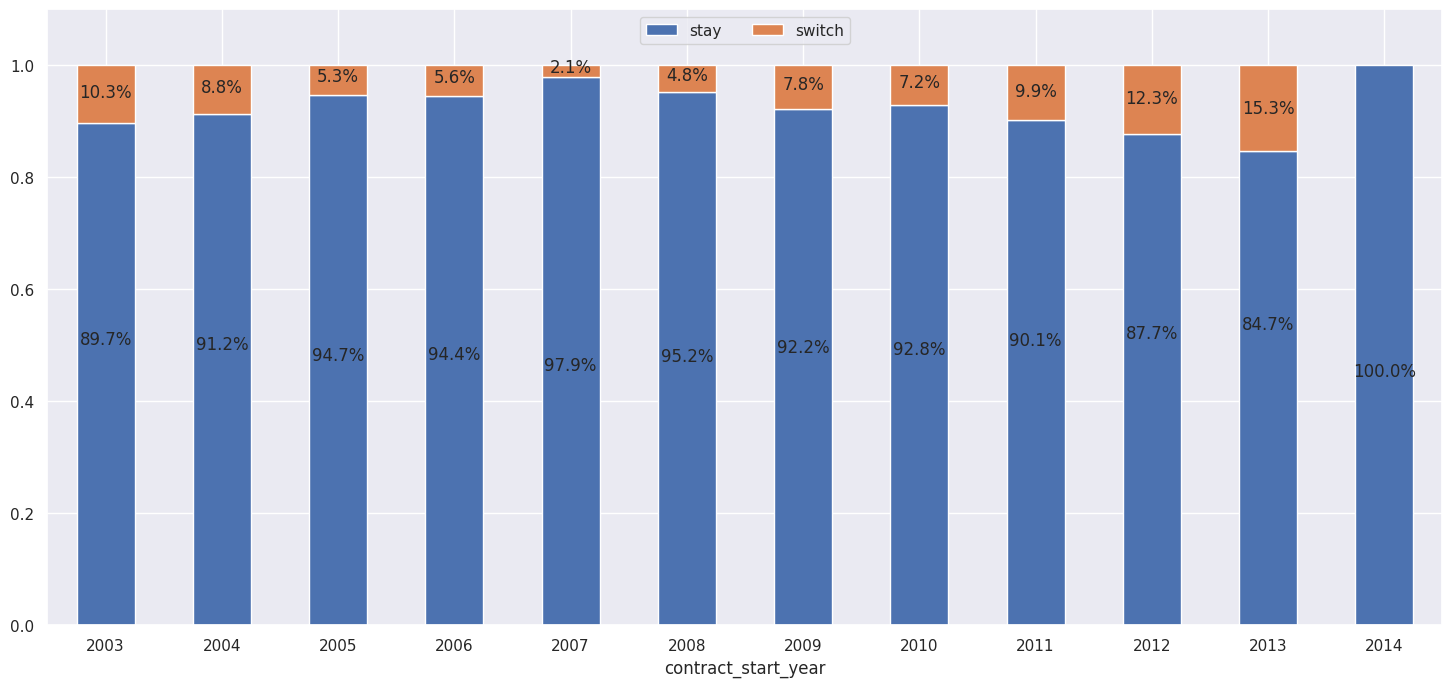

In [16]:
plot_churn(df=client, target_variable='contract_start_year', if_sort=False, size=(18,8))

Both, recent and very old customers are more likely to churn.

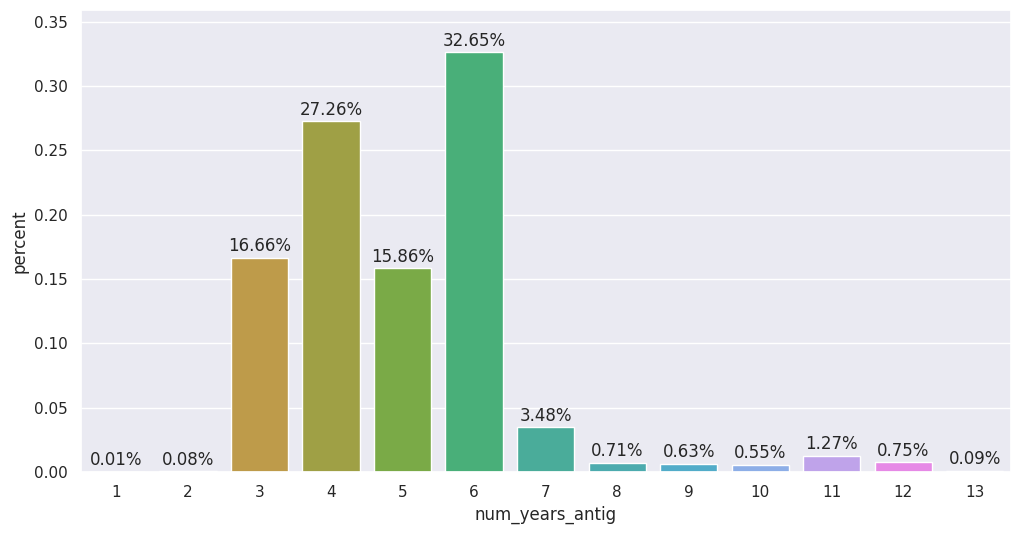

In [17]:
plot_feature(df=client, target_variable='num_years_antig', if_sort=False, gap_label_bar=0.005,
size=(12,6))

The majority of customers stay with the provider for 3-6 years.

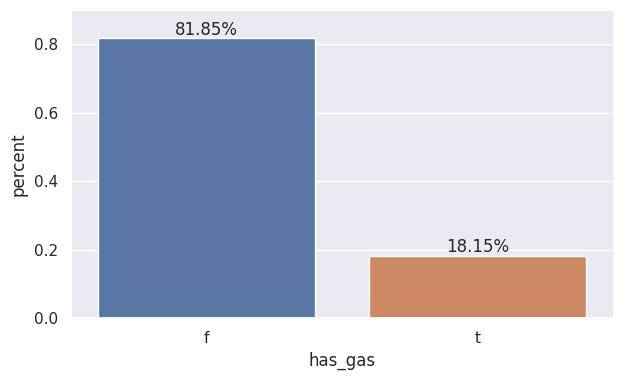

In [18]:
plot_feature(df=client, target_variable='has_gas', if_sort=False, gap_label_bar=0.01)

Only 18.15% of customers are also enrolled in gas services.

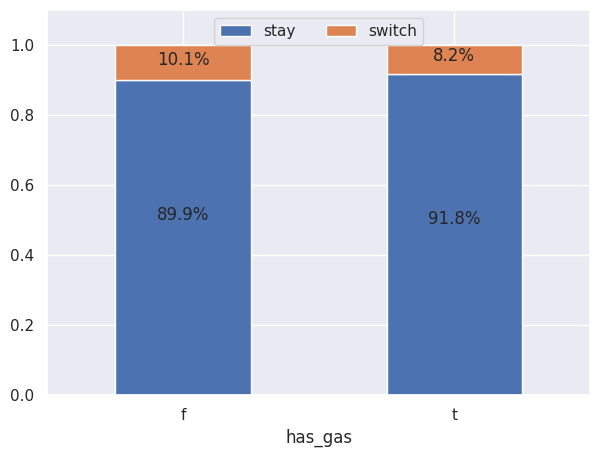

In [19]:
plot_churn(df=client, target_variable='has_gas', if_sort=False, size=(7,5))

It seems that electricity customers are slightly more likely to churn than gas customers.

In [20]:
# function to plot histogram
def histogram_churn(df, target_variable, size=(20,5), bins=100, if_churn=True):
    fig = plt.figure(figsize=size)
    if if_churn:
        ax = sns.histplot(data=df, x=target_variable, bins=bins, hue='churn')
    else:
        ax = sns.histplot(data=df, x=target_variable, bins=bins)



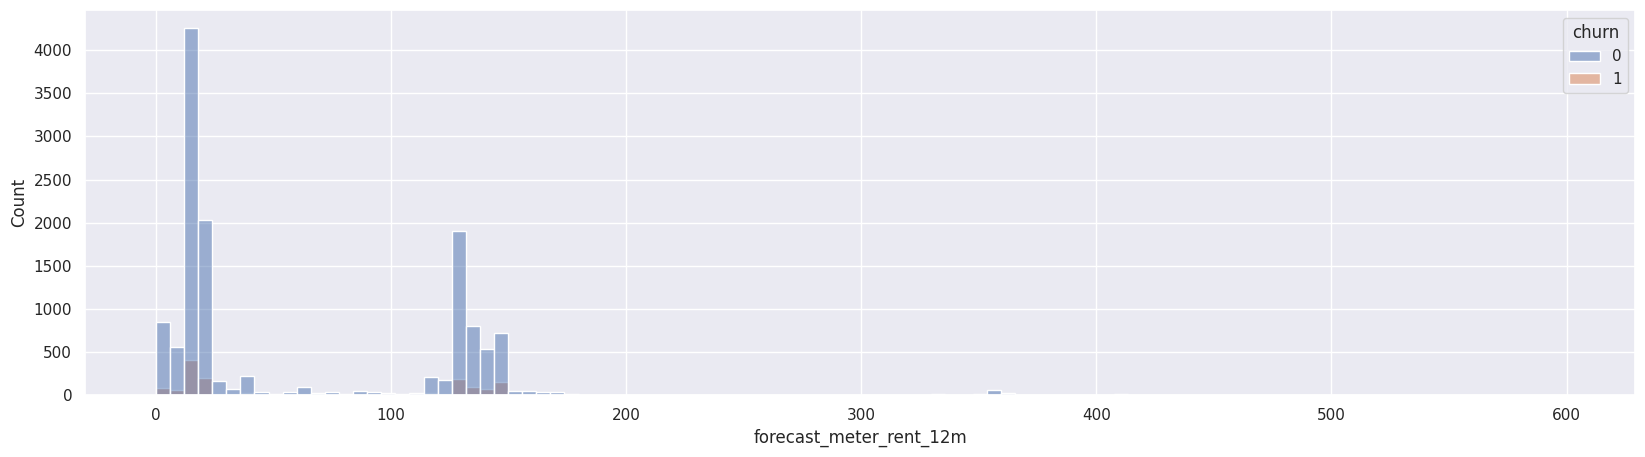

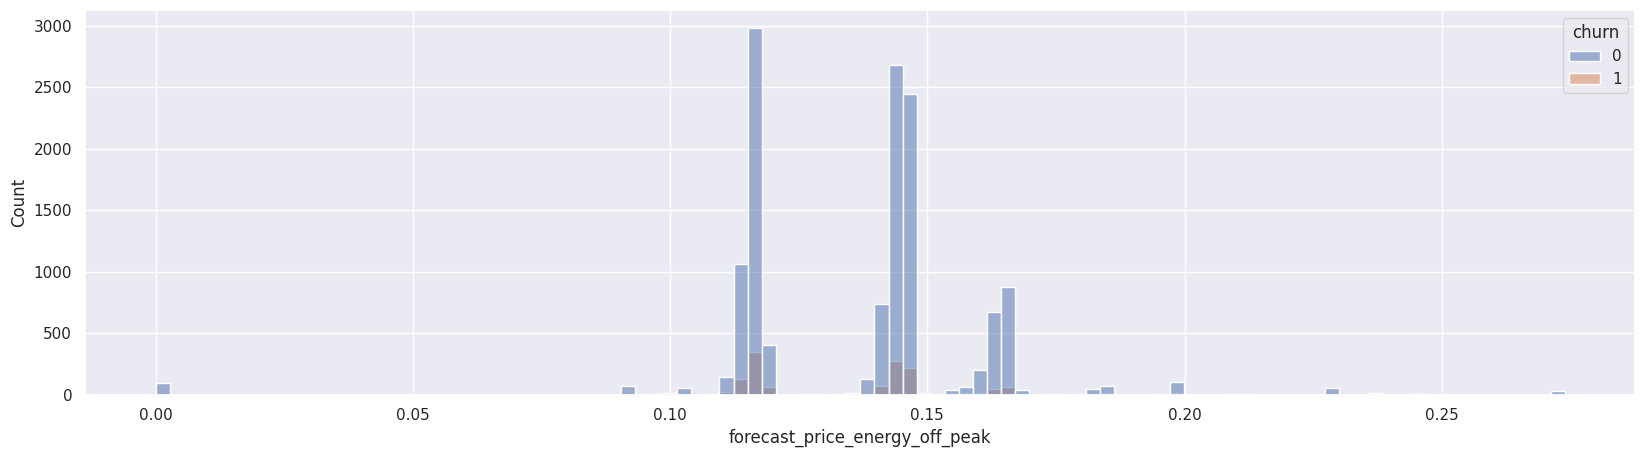

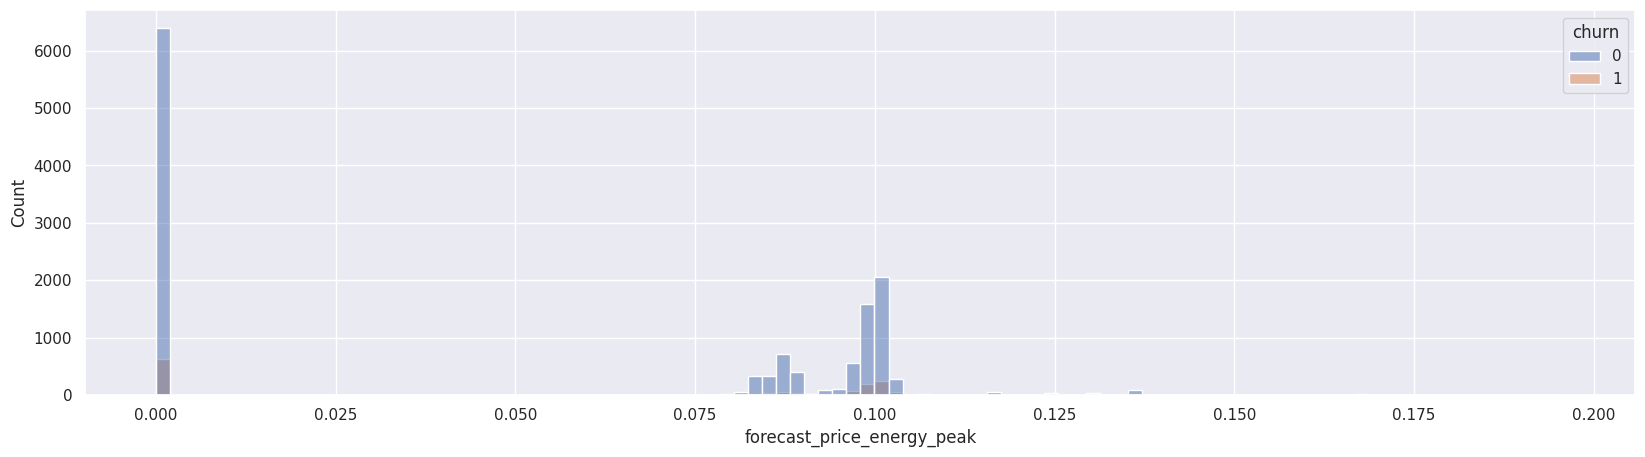

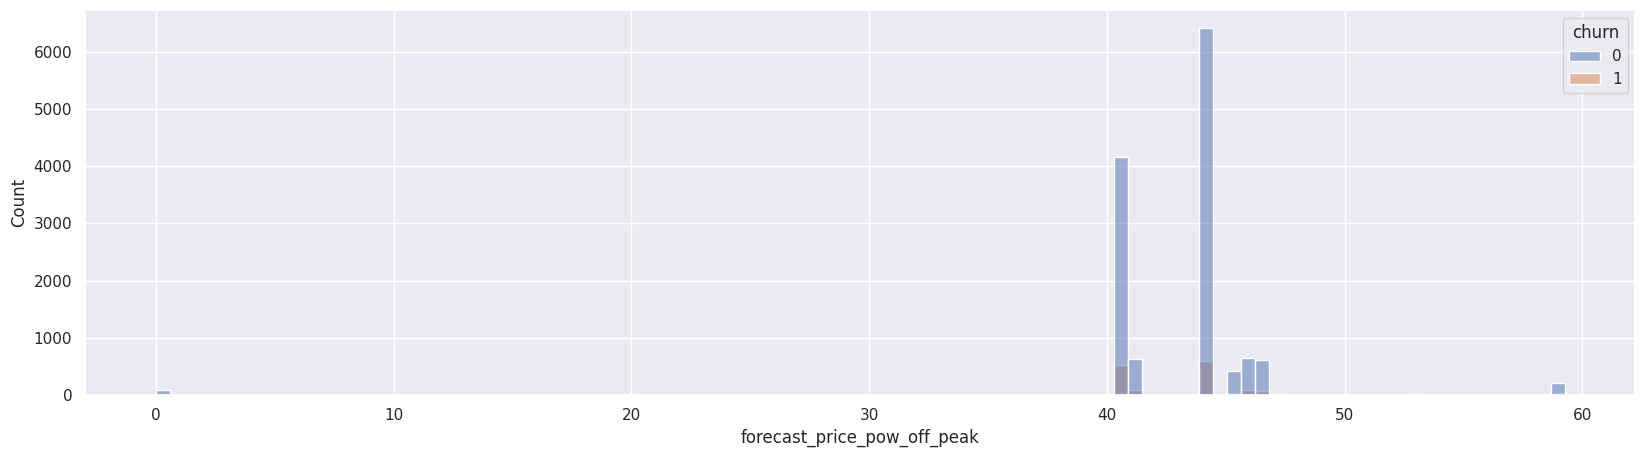

In [21]:
for attr in ['forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak',]:
    histogram_churn(df=client, target_variable=attr)

Each histogram for the price features seem to be centered around a couple of points.

## Sub-Task 2

We need to verify the the hypothesis of price sensitivity being correlated to customer churn to an extent. Ceteris paribus, we can classify customers being price sensitive in this scenario when there is an increase in price and there is some amount of customer churn. If there is customer churn and there is no change in price or even a decrease, then we will not consider then customers to be price sensitive.

In [22]:
stat_ = ['max', 'min', 'mean']
price_attr = ['price_off_peak_var','price_peak_var','price_mid_peak_var',
'price_off_peak_fix','price_peak_fix','price_mid_peak_fix']
price_stat = price.drop(columns=['price_date']).groupby(['id']).agg({'price_off_peak_var': 
stat_, 'price_peak_var': stat_, 'price_mid_peak_var': stat_, 'price_off_peak_fix': stat_, 
'price_peak_fix': stat_, 'price_mid_peak_fix': stat_,})

In [23]:
price_stat.columns = ['_'.join(x) for x in zip(price_stat.columns.get_level_values(0), 
price_stat.columns.get_level_values(1))]
price_stat = price_stat.reset_index()
price_stat.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,price_peak_fix_max,price_peak_fix_min,price_peak_fix_mean,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,44.444710,44.266931,44.385450,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [24]:
# to add churn data, the above data will be merged with client data
price_stat = price_stat.merge(client[['id','churn']], on=['id'], how='left')
price_stat = price_stat.dropna(subset=['churn']).reset_index(drop=True)
price_stat.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,price_peak_fix_max,price_peak_fix_min,price_peak_fix_mean,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean,churn
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694,0.0
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,44.444710,44.266931,44.385450,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [25]:
for attr in price_attr:
    price_stat[f'diff_max_min_{attr}'] = price_stat[f'{attr}_max'] - price_stat[f'{attr}_min']

In [26]:
price_stat.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,...,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean,churn,diff_max_min_price_off_peak_var,diff_max_min_price_peak_var,diff_max_min_price_mid_peak_var,diff_max_min_price_off_peak_fix,diff_max_min_price_peak_fix,diff_max_min_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,...,16.291555,16.226389,16.280694,0.0,0.008161,0.004169,0.003541,0.162916,0.097749,0.065166
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.004462,0.000000,0.000000,0.177779,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.054905,0.000000,0.000000,1.500000,0.000000,0.000000


The majority of prices for customers did not change too much.

In [27]:
for attr in price_attr:
    price_stat[f'diff_Dec_mean_{attr}'] = price[price['id'].isin(price_stat['id']
    )].groupby(['id'])[attr].nth(-1).values - price_stat[f'{attr}_mean']

In [28]:
price_stat.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,...,diff_max_min_price_mid_peak_var,diff_max_min_price_off_peak_fix,diff_max_min_price_peak_fix,diff_max_min_price_mid_peak_fix,diff_Dec_mean_price_off_peak_var,diff_Dec_mean_price_peak_var,diff_Dec_mean_price_mid_peak_var,diff_Dec_mean_price_off_peak_fix,diff_Dec_mean_price_peak_fix,diff_Dec_mean_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,...,0.003541,0.162916,0.097749,0.065166,-0.004432,-0.002121,0.000559,0.027153,0.016292,0.010861
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.177779,0.000000,0.000000,-0.002483,0.000000,0.000000,0.059260,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,1.500000,0.000000,0.000000,0.019722,0.000000,0.000000,0.625000,0.000000,0.000000


The majority of customers had similar prices the previous month compared to the average prices for the whole year

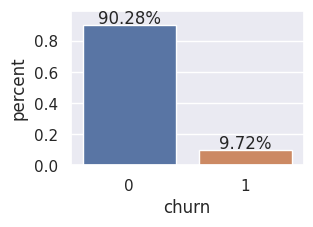

In [29]:
plot_feature(df=price_stat[price_stat['diff_Dec_mean_price_off_peak_var']>0], 
target_variable='churn', gap_label_bar=0.01, size= (3,2))

For the customers whose off-peak prices increased, 9.72% of customers churned.

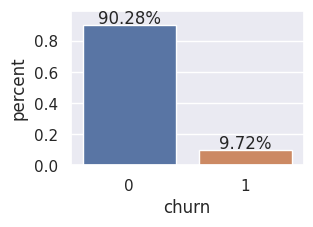

In [30]:
plot_feature(df=price_stat[price_stat['diff_Dec_mean_price_off_peak_var']<=0], 
target_variable='churn', gap_label_bar=0.01, size=(3,2))

For customers whose off-peak prices either stayed the same or decreased, again, 9.72% of customers churned.

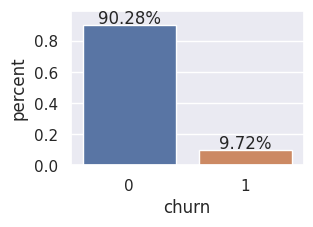

In [31]:
plot_feature(df=price_stat[price_stat['diff_Dec_mean_price_peak_var']>0], 
target_variable='churn', gap_label_bar=0.01, size= (3,2))

For customers whose peak prices increased, 9.72% of customers churned.

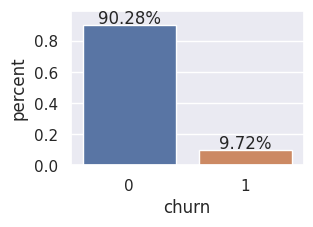

In [32]:
plot_feature(df=price_stat[price_stat['diff_Dec_mean_price_peak_var']<=0], 
target_variable='churn', gap_label_bar=0.01, size=(3,2))

For customers whose peal prices either decreased of stayed the same, again 9.72% of customers churned.

From the figures above, it is clear that regardless of price changes, the proportion of customers that leave consistently remained at 9.72%. In other words, pricing increases had no impact on consumer attrition. We can therefore assume that consumers were not price sensitive.

## Sub-Task 3

Key Findings:

- Customer churn rate is ~9.72%

- Electricity customers are more likely to churn than gas customers

- Customer prices remained relatively stable

- Changes in prices for both peak and off-peak periods do not affect customer churn

- Consumers of client' services were not price sensitive

Suggestions:

- Receiving competitor data would allow to compare prices, and if the alternatives are providing better prices than it is more likely that the customers change services.

- Conducting surveys or focus groups with past and current customers about pricing, satisfaction, why they left, etc will provide more insight into the problem.

# Feature Engineering and Modeling

## Sub-Task 1

### Importing Packages

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

### Data

In [34]:
training_data = client.copy()
training_data['year_modif_prod'] = training_data['date_modif_prod'].dt.year
training_data['year_renewal'] = training_data['date_renewal'].dt.year
training_data = training_data.drop(columns=['date_activ','date_end',
'date_modif_prod','date_renewal'])

In [35]:
has_gas_enc = LabelEncoder()
training_data['has_gas'] = has_gas_enc.fit_transform(training_data['has_gas'])

In [36]:
# adding new features by assessing the difference in last price and first price for each customer
diff_dec_jan_off_peak_var = price.sort_values(by=['price_date']).groupby(
    ['id'])['price_off_peak_var'].nth(-1) - price.sort_values(by=[
        'price_date']).groupby(['id'])['price_off_peak_var'].nth(0)

diff_dec_jan_off_peak_var = diff_dec_jan_off_peak_var.reset_index(name='diff_dec_jan_off_peak_var')

diff_dec_jan_off_peak_fix = price.sort_values(by=['price_date']).groupby(
    ['id'])['price_off_peak_fix'].nth(-1) - price.sort_values(by=[
        'price_date']).groupby(['id'])['price_off_peak_fix'].nth(0)

diff_dec_jan_off_peak_fix = diff_dec_jan_off_peak_fix.reset_index(name='diff_dec_jan_off_peak_fix')

training_data = training_data.merge(diff_dec_jan_off_peak_var, on='id', how='left')
training_data = training_data.merge(diff_dec_jan_off_peak_fix, on='id', how='left')

In [37]:
# add the same differences to other price metrics
for attr in ['price_peak_var','price_peak_fix','price_mid_peak_var','price_mid_peak_fix']:
    diff_dec_jan_temp = price.sort_values(by=['price_date']).groupby(
        ['id'])[attr].nth(-1) - price.sort_values(by=['price_date']).groupby(['id'])[attr].nth(0)
    diff_dec_jan_temp = diff_dec_jan_temp.reset_index(name=f'diff_dec_jan_{attr}')
    training_data = training_data.merge(diff_dec_jan_temp, on='id', how='left')

In [38]:
training_data = training_data.merge(price_stat[['id','diff_Dec_mean_price_off_peak_var',
'diff_Dec_mean_price_off_peak_fix','diff_Dec_mean_price_peak_var','diff_Dec_mean_price_peak_fix',
'diff_Dec_mean_price_mid_peak_var', 'diff_Dec_mean_price_mid_peak_fix',]], on='id', how='left')


In [39]:
training_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,diff_dec_jan_price_peak_var,diff_dec_jan_price_peak_fix,diff_dec_jan_price_mid_peak_var,diff_dec_jan_price_mid_peak_fix,diff_Dec_mean_price_off_peak_var,diff_Dec_mean_price_off_peak_fix,diff_Dec_mean_price_peak_var,diff_Dec_mean_price_peak_fix,diff_Dec_mean_price_mid_peak_var,diff_Dec_mean_price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,-0.017912,-24.339581,-0.071536,-16.226389,0.021246,3.324664,-0.015266,-22.352010,-0.066530,-14.901340
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0.0,16.27,0.145711,...,0.000000,0.000000,0.000000,0.000000,-0.002009,0.133335,-0.007124,0.000000,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,...,0.000528,0.000000,0.000000,0.000000,-0.002714,0.059260,-0.000012,0.000000,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,...,0.000000,0.000000,0.000000,0.000000,-0.002624,0.044445,0.000000,0.000000,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,445.75,526,0.0,131.73,0.116900,...,-0.002302,0.097749,0.003487,0.065166,-0.004268,0.040729,-0.001965,0.024437,0.000854,0.016292


In [40]:
# formulating the data for training and their labels
x_values = training_data.drop(columns=['id','channel_sales','origin_up','churn'])
y_values = training_data['churn']
x_values.shape, y_values.shape

((14606, 34), (14606,))

## Sub-Task 2

### Building a Random Forest Model

There is no testing set, as a result, an out of fold cross-validation strategy should be implemented to evaluate the model's performance. The training set is also fairly imbalanced, so, indicators such as precision and recall will be used as metrics, rather than the accuracy.

In [41]:
training_labels = np.zeros(shape=(x_values.shape[0], 2))
feature_importance = pd.DataFrame(data={'feature_name':x_values.columns, 
'feature_importance':[0] * len(x_values.columns)})

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)
fold_counter = 1
for training_index, testing_index in kfold.split(x_values, y_values):
    x_training, x_testing = x_values.loc[training_index], x_values.loc[testing_index]
    y_training, y_testing = y_values[training_index], y_values[testing_index]
    # model building
    rf = RandomForestClassifier(random_state=None)
    # model training
    rf.fit(x_training, y_training)
    training_labels[testing_index] = rf.predict_proba(x_testing)
    feature_importance['feature_importance'] = feature_importance[
        'feature_importance'] + (rf.feature_importances_)
    print(f'''Fold {fold_counter} Precision {precision_score(y_testing, rf.predict(x_testing)):.3f} 
    Recall {recall_score(y_testing, rf.predict(x_testing)):.3f} 
    Accuracy {accuracy_score(y_testing, rf.predict(x_testing)):.3f}''')
    fold_counter = fold_counter + 1
# predicted labels
pred_y = training_labels.argmax(axis = -1)
print(f'''Total  Precision {precision_score(y_values, pred_y):.3f} 
Recall {recall_score(y_values, pred_y):.3f} Accuracy {accuracy_score(y_values, pred_y):.3f}''')


Fold 1 Precision 0.850 
    Recall 0.060 
    Accuracy 0.908
Fold 2 Precision 0.952 
    Recall 0.070 
    Accuracy 0.909
Fold 3 Precision 0.840 
    Recall 0.074 
    Accuracy 0.909
Fold 4 Precision 0.895 
    Recall 0.060 
    Accuracy 0.908
Fold 5 Precision 0.889 
    Recall 0.057 
    Accuracy 0.908
Total  Precision 0.883 
Recall 0.064 Accuracy 0.908


We will now create a figure to visualize the importance of each feature when growing the trees.

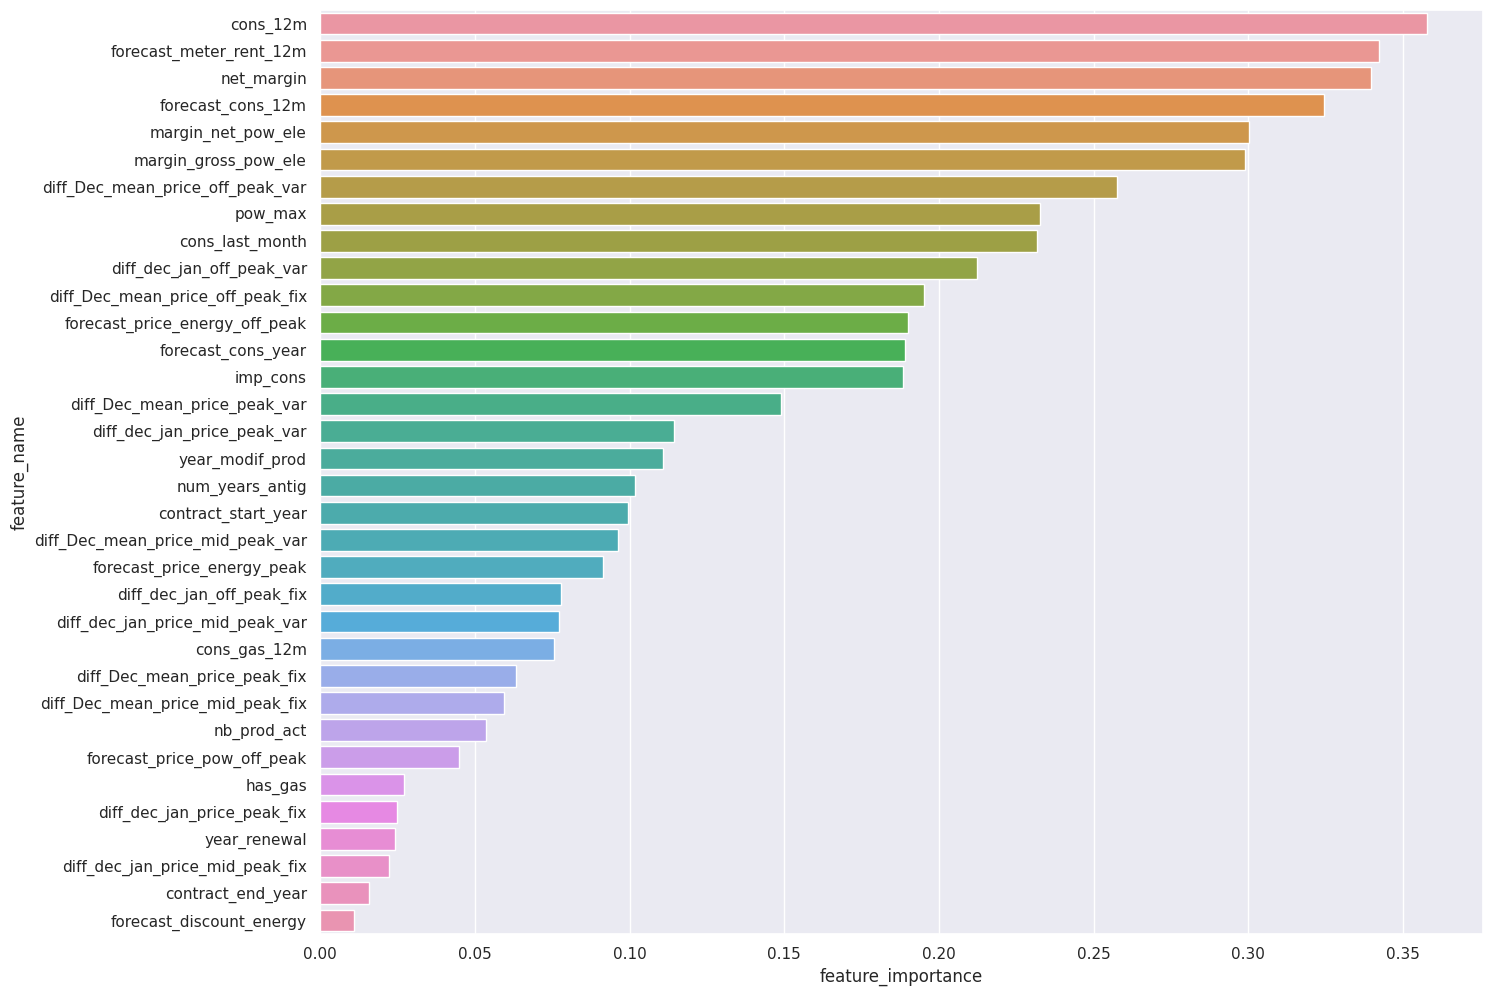

In [42]:
feature_fig = plt.figure(figsize= (15, 12))
ax = sns.barplot(data=feature_importance.sort_values(by=['feature_importance'], ascending=False
), y='feature_name', x='feature_importance')

Below, shows the main metrics of classification.

In [43]:
print(classification_report(y_values, pred_y))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     13187
           1       0.88      0.06      0.12      1419

    accuracy                           0.91     14606
   macro avg       0.90      0.53      0.54     14606
weighted avg       0.91      0.91      0.87     14606



We will also create a figure to to visualize the confusion matrix.

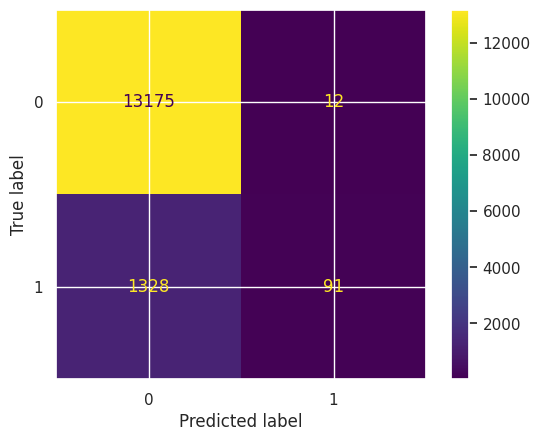

In [44]:
con_mat = confusion_matrix(y_values, pred_y, labels= rf.classes_)
dis = ConfusionMatrixDisplay(confusion_matrix= con_mat, display_labels= rf.classes_)
dis.plot()

As we can see, performance is not ideal at all. Although the model managed to cross a 90% level of accuracy, the actual results are not able to provide optimal insights. This is because the model is only focusing on predicting the negative class (0) rather than the positive class (1). Out of 14,606 predictions, 99% of predictions are predicting the negative class. This provides us very little information on what customers may actually churn.

### Business Impact of 20% Discount

An analysis can be conducted on the proposed discount strategy. The client suggested a 20% discount be offered to high propensity to churn customers in order to improve financial performance. We will assume the customers that are offered this discount will accept it. However, a couple things need to be considered.

- We concluded previously that price sensitivity was not a factor in customer churn, so a discount is unlikely to improve this situation.

- Even though we may be able to predict, the actual implementation of the discount may derive other results as things may change in the future.

- Churn probability for each customer may be predicted as a function of price along with other factors such as margin, so a strategy for each company that maximizes the revenue or profit could be found.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bf55319d-8704-4845-86cc-0548e806abea' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>